Predicted class: 1


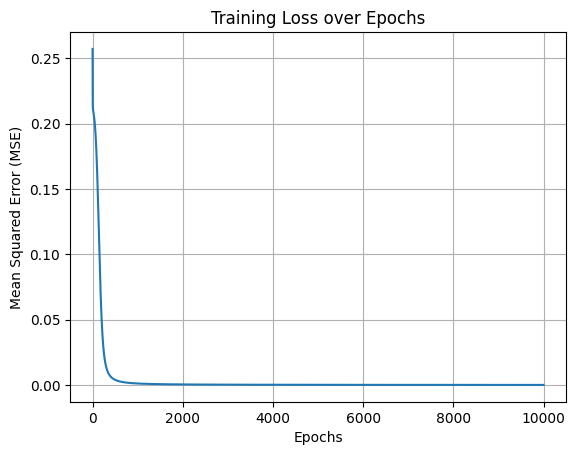

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
X = np.array([
    [0,0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0 ,1, 1, 1, 0, 0, 0, 0, 0, 0],  # Class square
    [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],  # Class circle
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1], # Class triangle
    [1,1, 1, 1, 1, 1,0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1], # square
    [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], # triangle

])
y = np.array([
    [1, 0, 0],  # Class 1
    [0, 1, 0],  # Class 2
    [0, 0, 1],# Class 3
    [1,0,0],
    [0,0,1],
])
input_neurons = 25
hidden_neurons = 50
output_neurons = 3
np.random.seed(1)
weights_input_hidden = np.random.uniform(low=-0.1, high=0.1, size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(low=-0.1, high=0.1, size=(hidden_neurons, output_neurons))
learning_rate = 0.1
epochs = 10000
losses = []
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y - output_layer_output
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    mse = np.mean(np.square(error))
    losses.append(mse)
new_data = np.array([[0,0, 0, 0, 0, 0,0, 1, 1, 0, 0,0, 1, 1, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0]])

hidden_layer_input = np.dot(new_data, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
output_layer_output = sigmoid(output_layer_input)
predicted_class = np.argmax(output_layer_output)

print("Predicted class:", predicted_class + 1)
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()
